**BT : Automobile cruise control**

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=1ddb043d6888beb717ec59d43dc6ca97c8d3a7c9628f0d991978aa3d83d06d9e
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.controlsystem import Antecedent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection

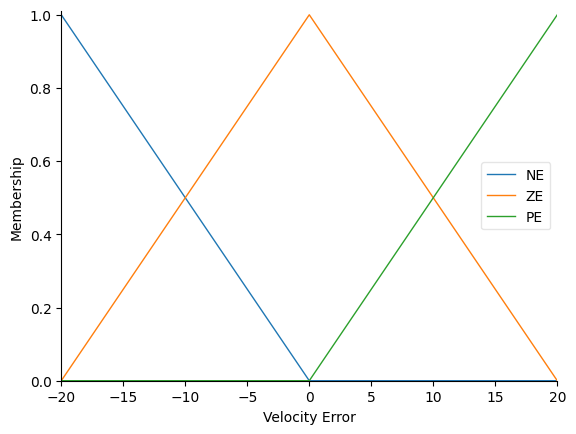

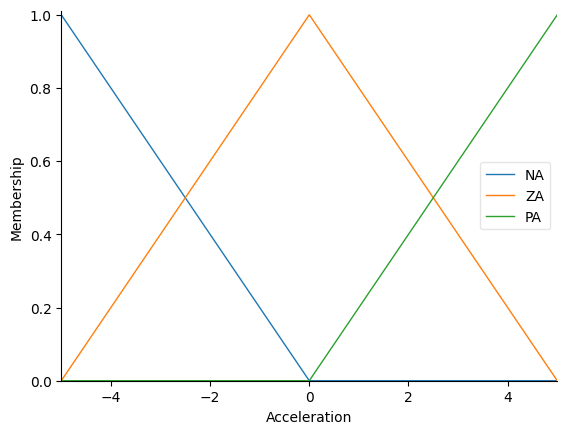

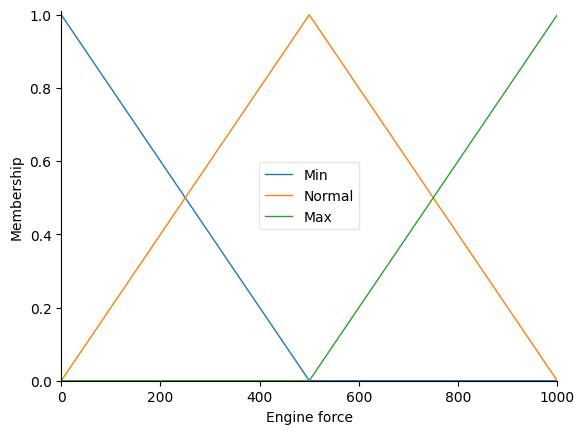

In [3]:
#input
vel = ctrl.Antecedent(np.linspace(-20, 20, 61), 'Velocity Error')
accel = ctrl.Antecedent(np.linspace(-5, 5, 61), 'Acceleration')
#output
force = ctrl.Consequent(np.linspace(0, 1000, 61), 'Engine force')

#membership
#name
names_vel = ['NE','ZE','PE']
names_accel = ['NA','ZA','PA']
names_force = ['Min','Normal','Max']

#.automf
vel.automf(names = names_vel)
accel.automf(names = names_accel)
force.automf(names = names_force)

#view
vel.view()
accel.view()
force.view()

In [4]:
#rules
rule = []
rule.append(ctrl.Rule(antecedent=(vel['NE'] & accel['NA'])|(vel['NE'] & accel['ZA'])|(vel['NE'] & accel['PA']), consequent=force['Min'], label='Rule Min'))
rule.append(ctrl.Rule(antecedent=(vel['ZE'] & accel['NA'])|(vel['ZE'] & accel['ZA'])|(vel['ZE'] & accel['PA']), consequent=force['Normal'], label='Rule Normal'))
rule.append(ctrl.Rule(antecedent=(vel['PE'] & accel['NA'])|(vel['PE'] & accel['ZA'])|(vel['PE'] & accel['PA']), consequent=force['Max'], label='Rule Max'))

559.5238095238095


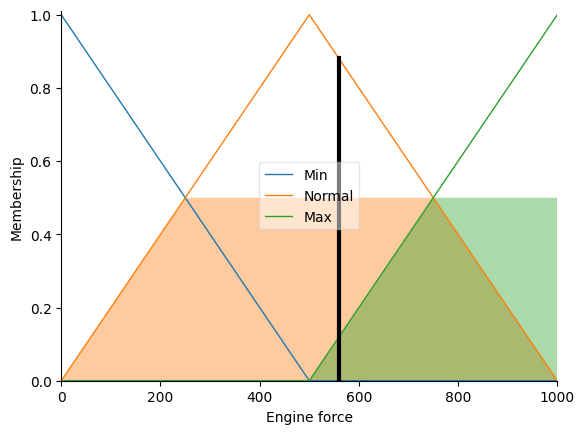

In [5]:
#control
force_system = ctrl.ControlSystem(rule)
force_simulation = ctrl.ControlSystemSimulation(force_system,flush_after_run = 61*61+1)

force_simulation.input['Velocity Error'] = 10
force_simulation.input['Acceleration'] = 5
force_simulation.compute()
print(force_simulation.output['Engine force'])
force.view(sim=force_simulation)

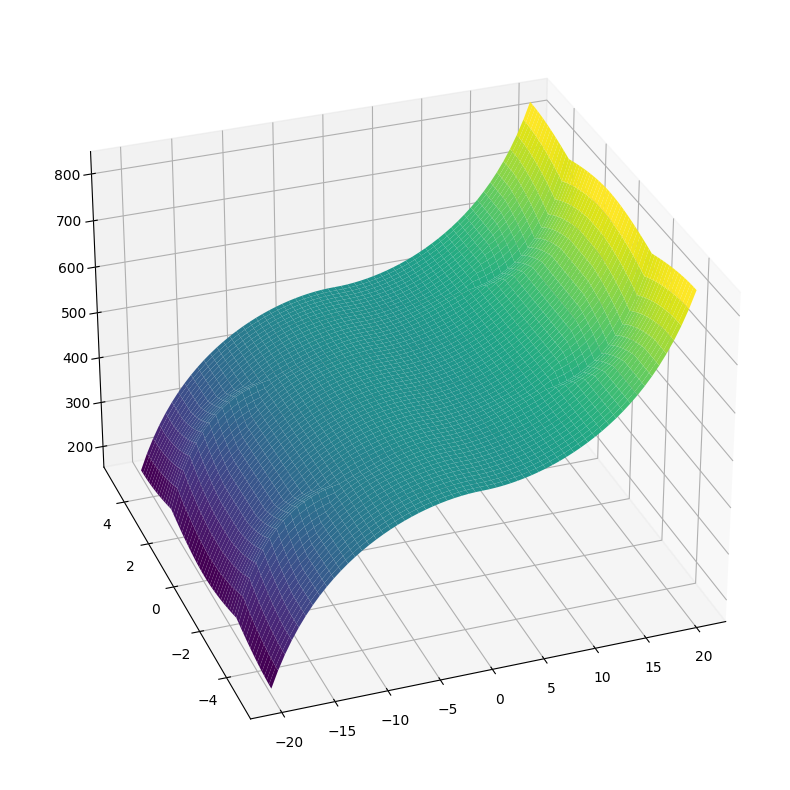

In [6]:
upsampled1 = np.linspace(-20,20, 61)
upsampled2 = np.linspace(-5,5, 61)

x,y = np.meshgrid(upsampled1, upsampled2)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    force_simulation.input['Velocity Error'] = x[i,j]
    force_simulation.input['Acceleration'] = y[i,j]
    force_simulation.compute()
    z[i,j] = force_simulation.output['Engine force']

#Xuất đồ thị
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.5, antialiased = True)
ax.view_init(30,250)